## Glass Identification

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
df= pd.read_csv('glass.csv')

In [54]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [55]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [56]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [58]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [59]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

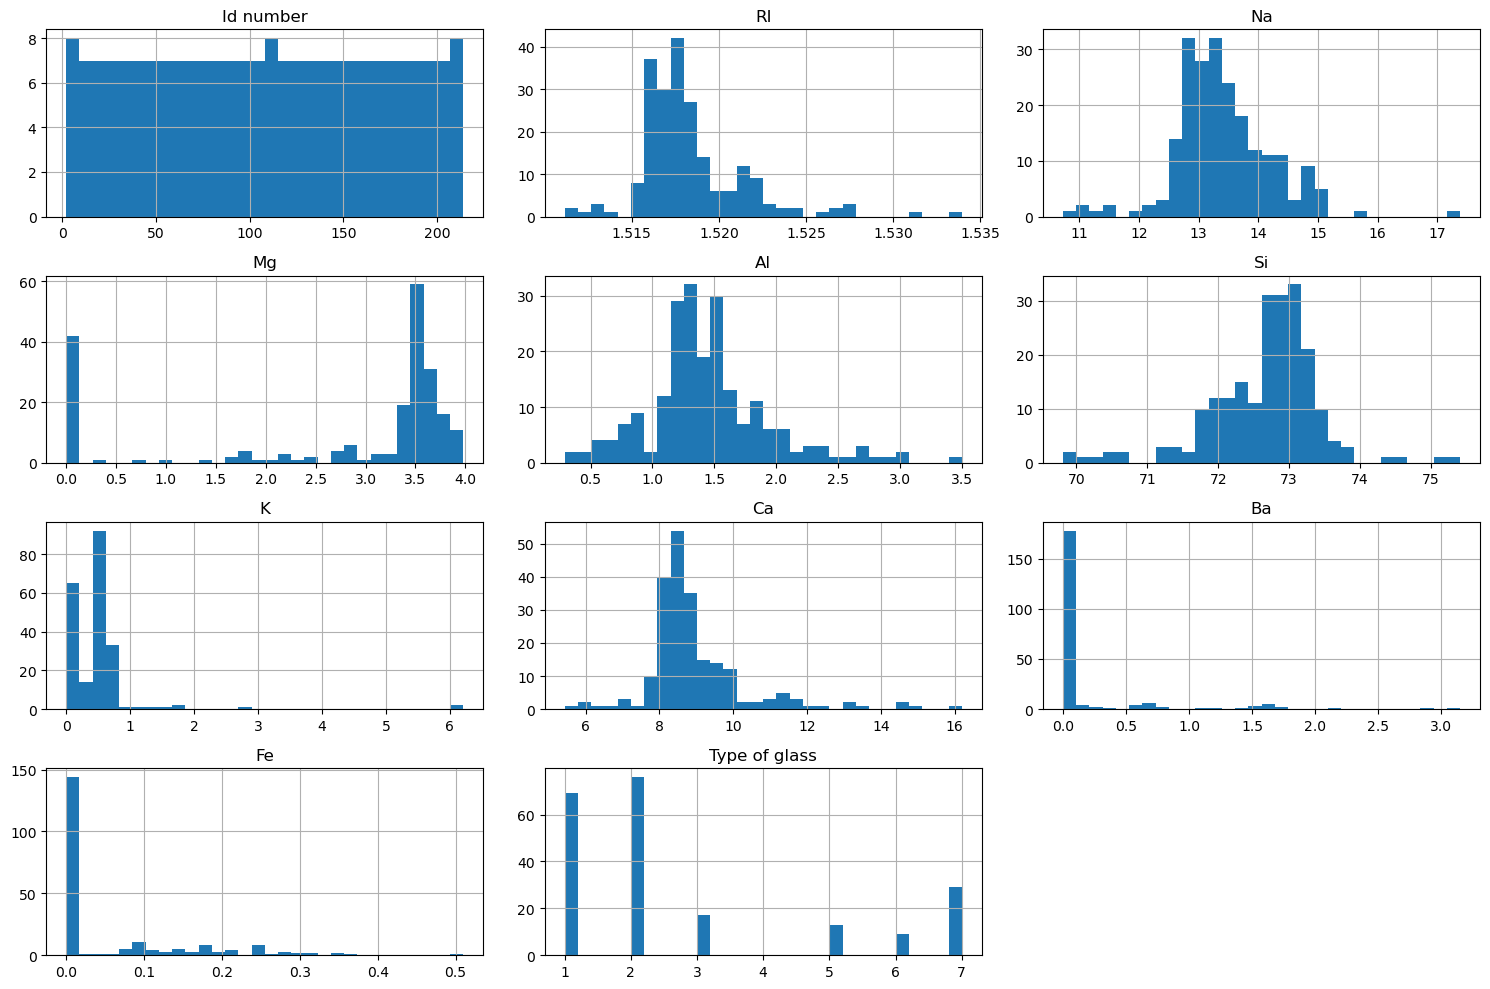

In [60]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

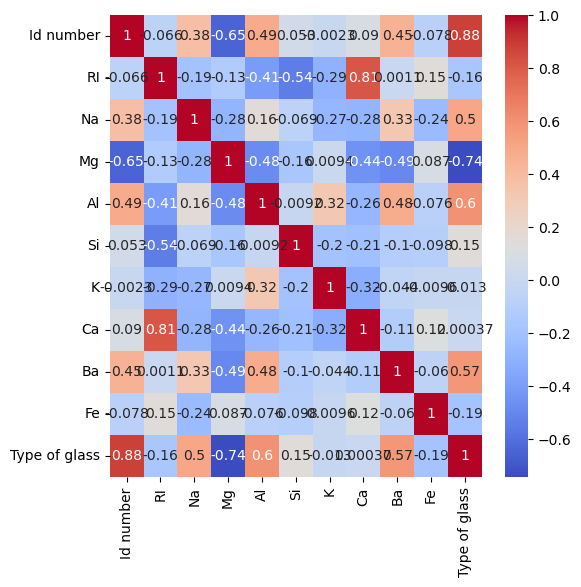

In [61]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [62]:
df.rename(columns={'Type of glass':'Type'},inplace=True)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


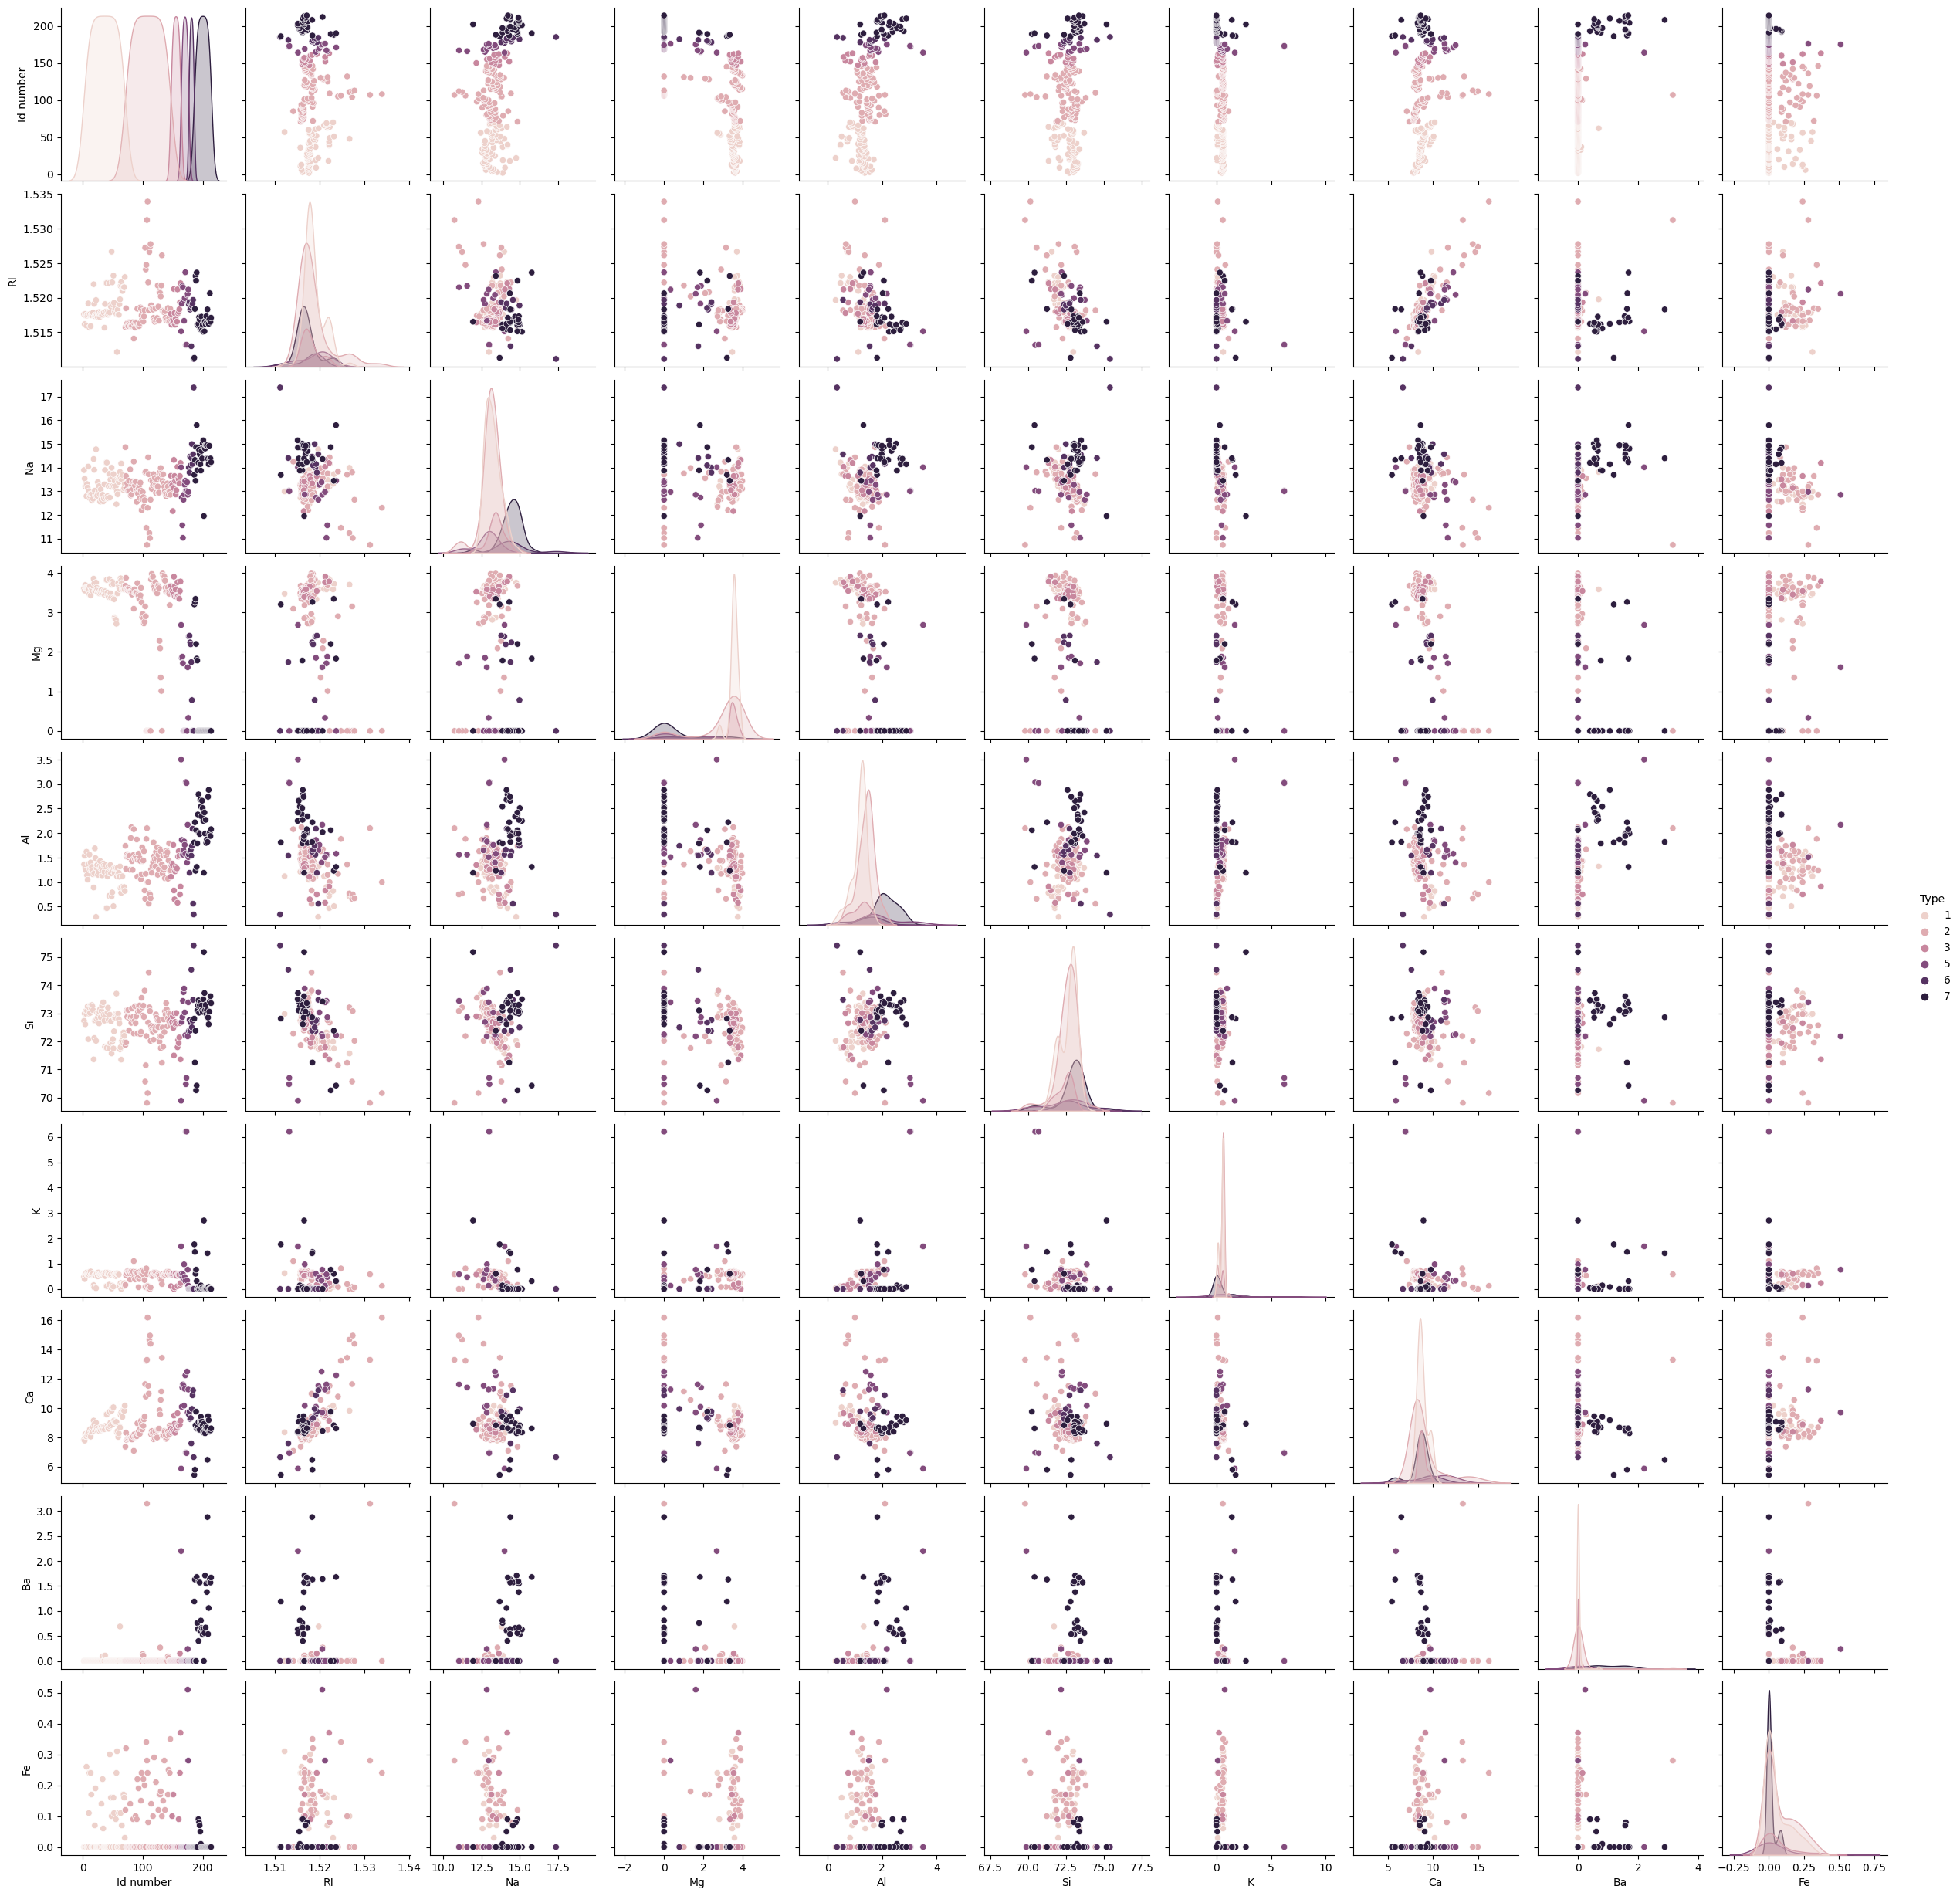

In [63]:
sns.pairplot(df, hue='Type')
plt.show()

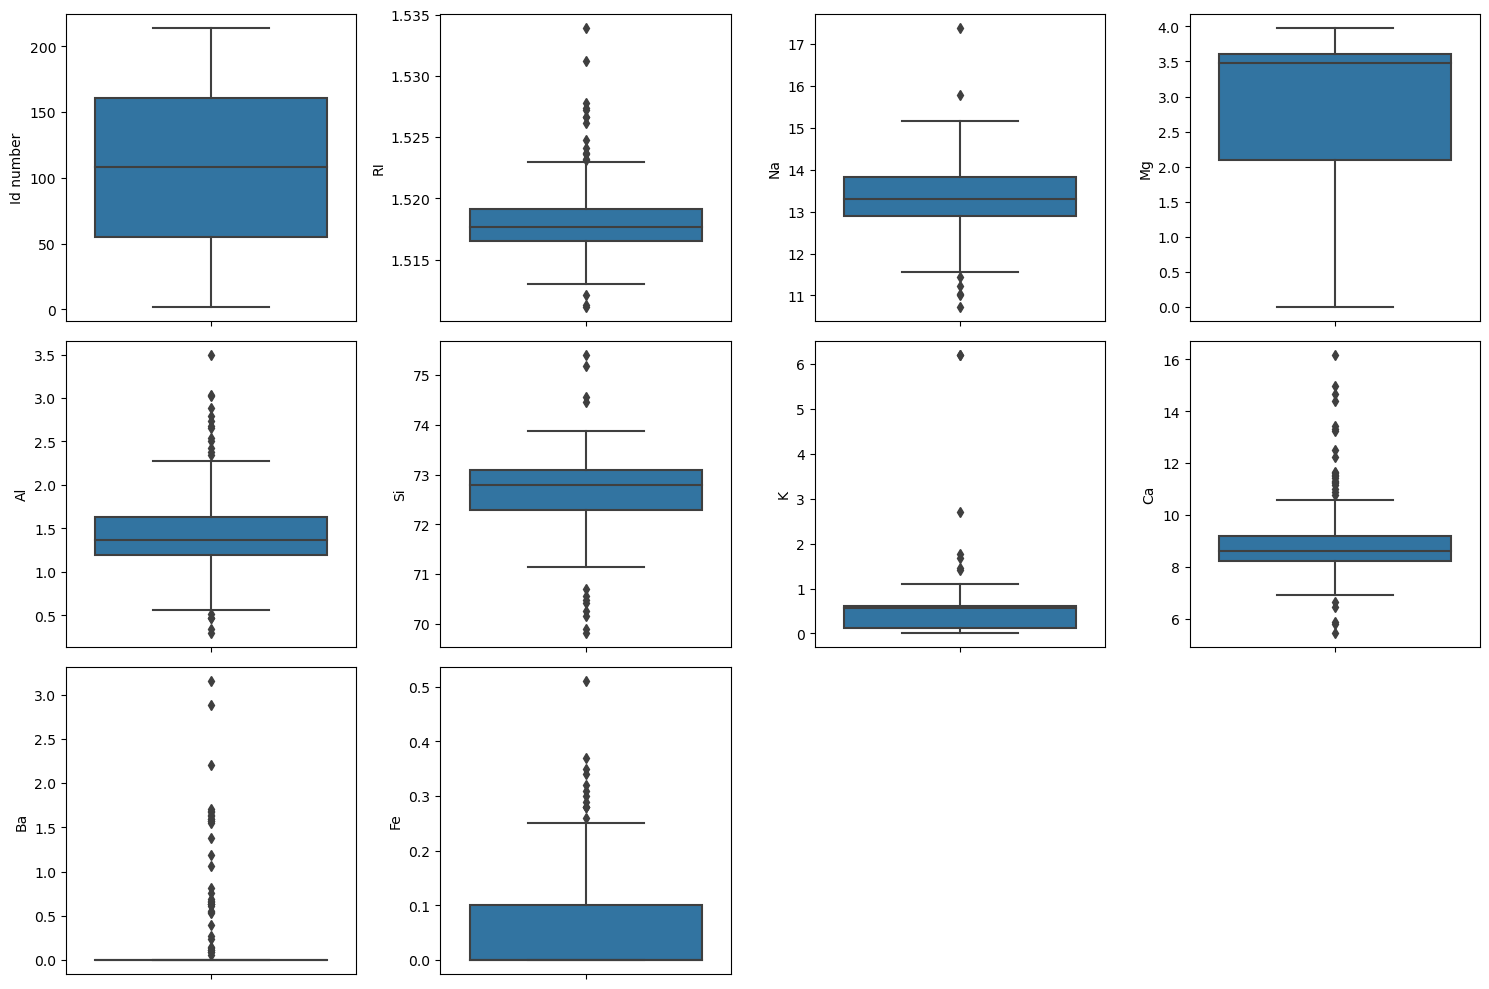

In [64]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
plt.tight_layout()
plt.show()

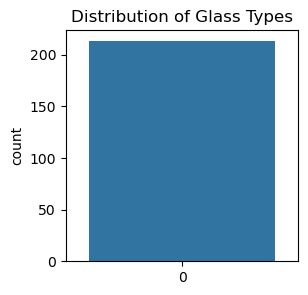

In [65]:
plt.figure(figsize=(3, 3))
sns.countplot(df['Type'])
plt.title('Distribution of Glass Types')
plt.show()

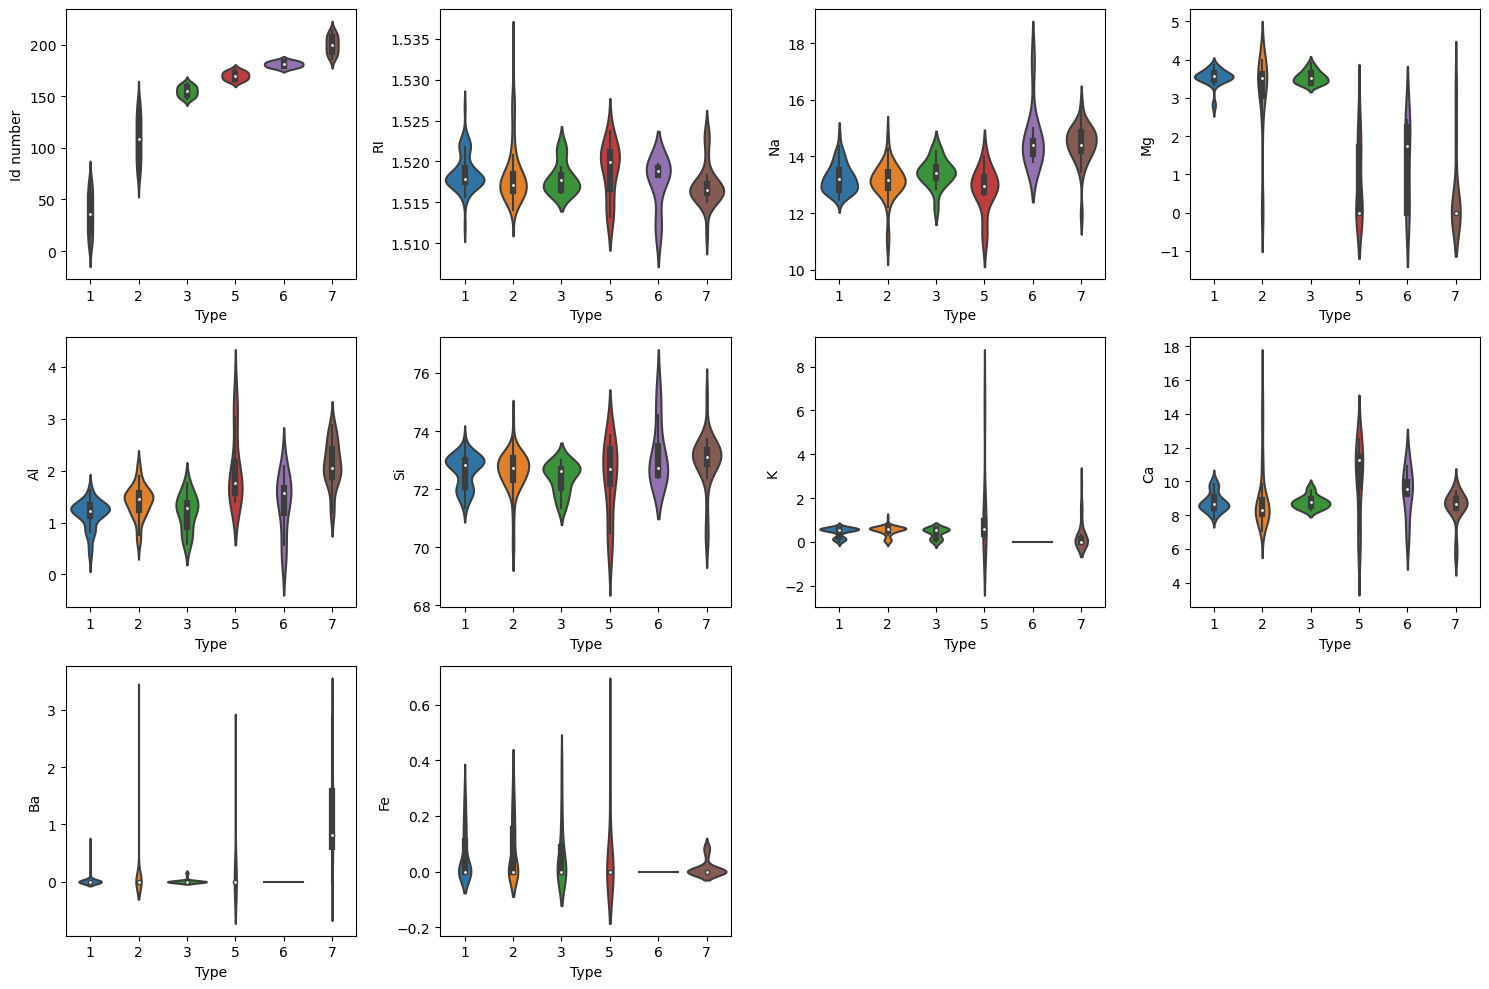

In [66]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.violinplot(x='Type', y=column, data=df)
plt.tight_layout()
plt.show()

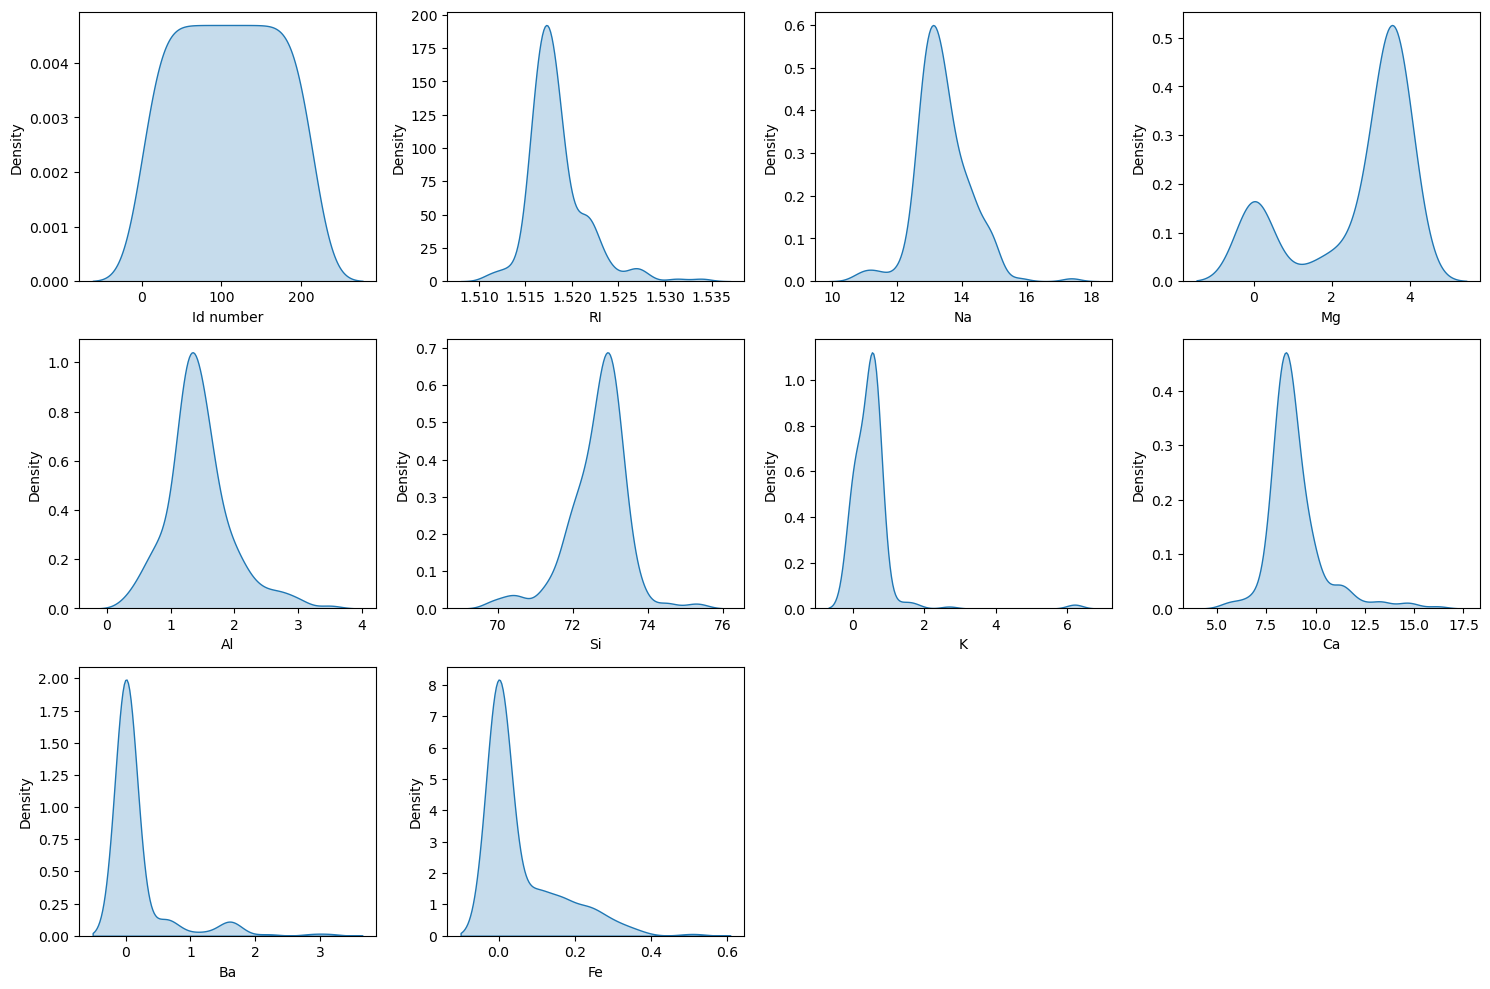

In [67]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(df[column], shade=True)
plt.tight_layout()
plt.show()

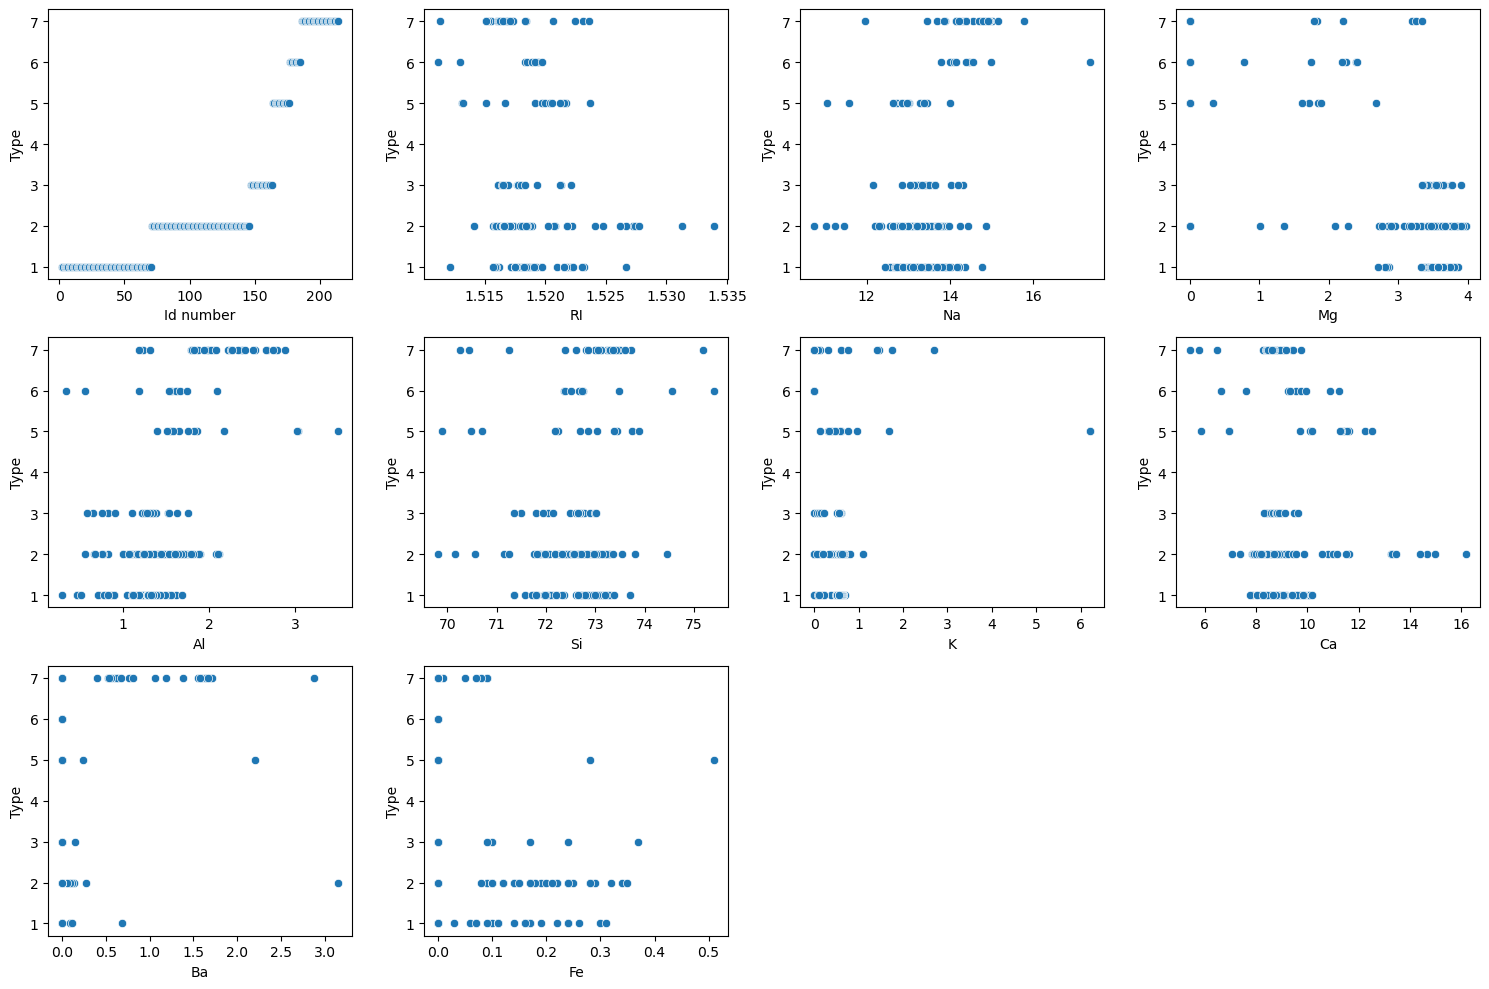

In [68]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=column, y='Type', data=df)
plt.tight_layout()
plt.show()

In [69]:
correlation_with_target = df.corr()['Type'].sort_values(ascending=False)
print(correlation_with_target)

Type         1.000000
Id number    0.878113
Al           0.597754
Ba           0.574896
Na           0.504983
Si           0.147767
Ca           0.000372
K           -0.012765
RI          -0.161322
Fe          -0.191090
Mg          -0.744004
Name: Type, dtype: float64


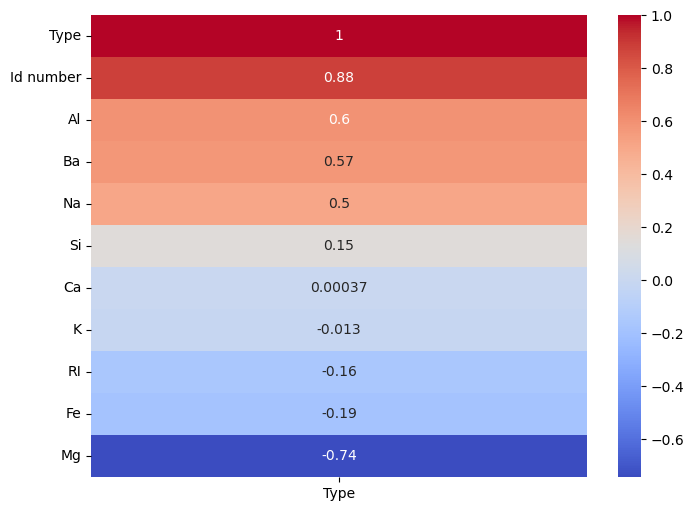

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr()[['Type']].sort_values(by='Type', ascending=False), annot=True, cmap='coolwarm')
plt.show()

In [71]:
X = df.drop(columns=['Type'])
y = df['Type']


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [78]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9859154929577465
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        11

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71

